<a href="https://colab.research.google.com/github/ambulesubhada07/Data_Science_pandas/blob/main/Empty_Employee_DB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee DB SF Salaries Exercise



# **Load Necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** Read Salaries.csv as a dataframe called sal.**

In [2]:
sal = pd.read_csv('Salaries.csv')

# ** Check the head of the DataFrame. **

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
# Check nan values
sal.isnull().sum()

,0
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


In [5]:
#total records , rows and columns
print('Total no. of Rows:',sal.shape[0])
print('Total no. of Columns:',sal.shape[1])

Total no. of Rows: 148654
Total no. of Columns: 13


In [6]:
#check/list out feature/column names
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [7]:
#drop Notes and Status columns
sal.drop(columns=['Notes','Status'],axis=1,inplace=True)

In [8]:
#check new shape
sal.shape

(148654, 11)

In [9]:
#check columns
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [10]:
#fill BasePay NaN by using some technique
#sal.BasePay.mean()--> 66325
sal.BasePay.fillna(66325,inplace=True)

<ipython-input-10-3fc4f0e2ca0b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sal.BasePay.fillna(66325,inplace=True)


In [11]:
sal.BasePay.isna().sum()

np.int64(0)

In [12]:
sal[:1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


# **What is the average BasePay ?**

In [13]:
#sal['BasePay'].mean()
round(sal.BasePay.mean())

66325

In [14]:
#np.round(sal.BasePay.mean())
sal.BasePay.mean().round()

np.float64(66325.0)

# ** What is the highest amount of OvertimePay in the dataset ? **

In [15]:
sal.OvertimePay.max()

245131.88

## Fetch record of Highest paid employee

In [16]:
# consider TOtalPay column
sal.query("TotalPay==TotalPay.max()")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


## Fetch name of highest Overtime pay employee


In [17]:
sal.query('OvertimePay==OvertimePay.max()')['EmployeeName']

,EmployeeName
1,GARY JIMENEZ


# ** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [18]:
sal.query("EmployeeName=='JOSEPH DRISCOLL'")['JobTitle']

,JobTitle
24,"CAPTAIN, FIRE SUPPRESSION"


# Fetch entries of all Joseph Driscoll

In [19]:
#sal.EmployeeName.str.lower()
sal.query("EmployeeName.str.lower()=='joseph driscoll'")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,San Francisco
36198,36199,Joseph Driscoll,"Captain, Fire Suppression",145658.98,114513.29,28743.36,42919.16,288915.63,331834.79,2012,San Francisco


# ** How much does JOSEPH DRISCOLL make (including benefits)? **

In [22]:
employee_sal= sal[sal["EmployeeName"] == "JOSEPH DRISCOLL"]["TotalPayBenefits"]
employee_sal

,TotalPayBenefits
24,270324.91


# ** What is the name, Job title of highest paid person (including benefits)?**

In [23]:
heighest_paid = sal.loc[sal["TotalPayBenefits"].idxmax(),["EmployeeName","JobTitle", "TotalPayBenefits"]]
heighest_paid


,0
EmployeeName,NATHANIEL FORD
JobTitle,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
TotalPayBenefits,567595.43


# ** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [24]:
lowest_paid = sal.loc[sal["TotalPayBenefits"].idxmin(), ["EmployeeName", "JobTitle", "TotalPayBenefits"]]
lowest_paid

,148653
EmployeeName,Joe Lopez
JobTitle,"Counselor, Log Cabin Ranch"
TotalPayBenefits,-618.13


## Show me the records with totalpaybenefit less than or equal to 0


In [25]:
negative_sal = sal[sal["TotalPayBenefits"] <= 0]
negative_sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
36158,36159,JOSEPHINE MCCREARY,MANAGER IV,0.0,0.0,0.00,NaN,0.00,0.00,2011,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,66325.0,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,66325.0,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,66325.0,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148626,148627,Paulet Gaines,Account Clerk,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148627,148628,Brett A Lundberg,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148628,148629,Mark W Mcclure,General Laborer,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.0,0.0,0.00,0.00,0.00,0.00,2014,San Francisco


# ** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [26]:
# Yearwise Average BasePay
basePay_year = sal.groupby("Year")["BasePay"].mean()
basePay_year

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,69576.859359
2014,66564.396804


# ** How many unique job titles are there? **

In [27]:
unique_Jtitles = sal["JobTitle"].nunique()
unique_Jtitles

2159

# ** What are the top 5 most common jobs? **

In [30]:
top_jobs = sal["JobTitle"].value_counts().head()
top_jobs

,count
JobTitle,
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [35]:
# last five
top_jobs= sal["JobTitle"].value_counts().tail(5)
print(top_jobs)

JobTitle
Light Rail Vehicle Equip Eng          1
Civil Case Settlmnt Specialist        1
ADMINISTRATOR, SFGH MEDICAL CENTER    1
CHIEF OF POLICE                       1
Special Assistant 8                   1
Name: count, dtype: int64


# **How many are there those work as a POLICE OFFICER III**

In [36]:
sal[sal["JobTitle"] == "POLICE OFFICER III"].shape[0]

779

# In which department we have least employees?

In [ ]:
least_emp = sal["Department"].value_counts().tail(1)
least_emp

# Fetch record of year 2011 where Basepay 200000

In [37]:
record_year = sal[(sal["Year"] == 2011) & (sal["BasePay"] == 200000)]
record_year

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


# How much average basepay is given to employees inthe year 2013

In [38]:
average_basepay = sal[sal["Year"] == 2013]["BasePay"].mean()
average_basepay

np.float64(69576.859358613)

# Plot.the % distribustion of Yearwise TotalPay

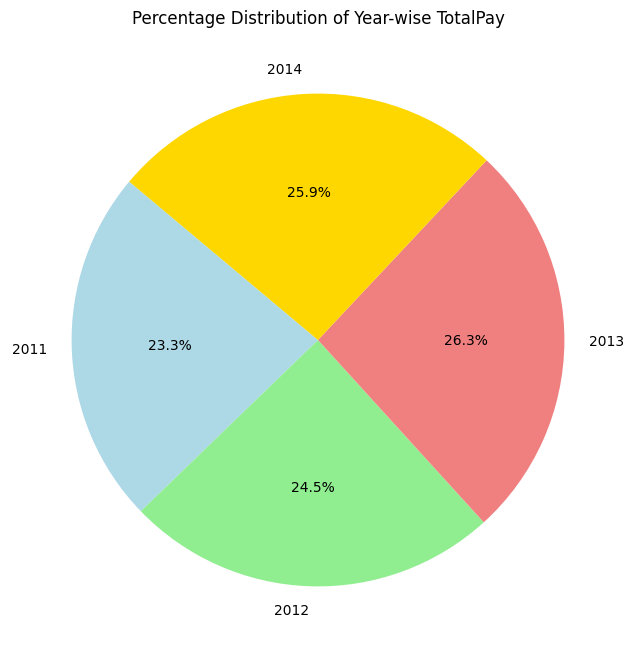

In [40]:
yearly_totalpay = sal.groupby("Year")["TotalPay"].sum()
plt.figure(figsize=(8, 8))
plt.pie(yearly_totalpay, labels=yearly_totalpay.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title("Percentage Distribution of Year-wise TotalPay")
plt.show()

# How many employees getting 0 overtimePay?

In [43]:
emp_overtime= (sal["OvertimePay"] == 0).sum()
print("Number of employees with 0 OvertimePay:", emp_overtime)


Number of employees with 0 OvertimePay: 77321


## Load data from Github